# AirNow and WRF-Chem

Our first example will demonstrate the basics available in MELODIES MONET to 
compare WRF-Chem model results against AirNow surface observations for
ozone and PM{subscript}`2.5`.

This example shows how one can compare results from two different model simulations against observations. This particular example compares WRF-Chem results using two different chemical mechanisms (RACM_ESRL and RACM_ESRL_VCP). Simulated surface ozone is slightly improved in WRF-Chem using the RACM_ESRL_VCP mechanism as compared to the AirNow observations.

First, we import the {mod}`melodies_monet.driver` module.

In [1]:
import sys; sys.path.append("../../")
# ^ sys.path-hacking needed until the package is installable

from melodies_monet import driver

Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


## Analysis driver class

Now, lets create an instance of the analysis driver class, {class}`melodies_monet.driver.analysis`.
It consists of these main parts:
* model instances
* observation instances
* a paired instance of both

In [2]:
an = driver.analysis()

Initially, most of our {class}`~melodies_monet.driver.analysis` object's attributes
are set to ``None``, though some have meaningful defaults:

In [3]:
an

analysis(
    control='control.yaml',
    control_dict=None,
    models={},
    obs={},
    paired={},
    start_time=None,
    end_time=None,
    download_maps=True,
    output_dir=None,
    debug=False,
)

## Control file

We set the YAML control file and begin by reading the file.

```{note}
Check out the {doc}`/appendix/yaml` for info on how to create
and modify these files.
```

In [4]:
an.control = "control_wrfchem_mech-0905_2.yaml"
an.read_control()
an.control_dict

{'analysis': {'start_time': '2019-09-05-06:00:00',
  'end_time': '2019-09-06-06:00:00',
  'output_dir': './output/airnow_wrfchem',
  'debug': True},
 'model': {'RACM_ESRL': {'files': 'example:wrfchem:racm_esrl',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp', 'surf_only_nc': True},
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 's', 'linestyle': '-'}},
  'RACM_ESRL_VCP': {'files': 'example:wrfchem:racm_esrl_vcp',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp', 'surf_only_nc': True},
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'gold', 'marker': 'o', 'linestyle': '-'}}},
 'obs': {'airnow': {'use_airnow': True,
   'filename': 'example:airnow:2019-09',
   'obs_type': 'pt_sfc',
   'variables': {'OZONE': {'unit_scale': 1,


````{admonition} Note: This is the complete file that was loaded.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
```
````

Now, some of our {class}`~melodies_monet.driver.analysis` object's attributes are populated:

In [5]:
an

analysis(
    control='control_wrfchem_mech-0905_2.yaml',
    control_dict=...,
    models={},
    obs={},
    paired={},
    start_time=Timestamp('2019-09-05 06:00:00'),
    end_time=Timestamp('2019-09-06 06:00:00'),
    download_maps=True,
    output_dir='./output/airnow_wrfchem',
    debug=True,
)

## Load the model data

The driver will automatically loop through the "models" found in the `model` section
of the YAML file and create an instance of {class}`melodies_monet.driver.model` for each
that includes the
* label
* mapping information
* file names (can be expressed using a glob expression)
* xarray object

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 25-57
```
````

In [6]:
an.open_models()

RACM_ESRL
{'files': 'example:wrfchem:racm_esrl', 'mod_type': 'wrfchem', 'mod_kwargs': {'mech': 'racm_esrl_vcp', 'surf_only_nc': True}, 'radius_of_influence': 12000, 'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 's', 'linestyle': '-'}}
example:wrfchem:racm_esrl
**** Reading WRF-Chem model output...
RACM_ESRL_VCP
{'files': 'example:wrfchem:racm_esrl_vcp', 'mod_type': 'wrfchem', 'mod_kwargs': {'mech': 'racm_esrl_vcp', 'surf_only_nc': True}, 'radius_of_influence': 12000, 'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'gold', 'marker': 'o', 'linestyle': '-'}}
example:wrfchem:racm_esrl_vcp
**** Reading WRF-Chem model output...


Applying {meth}`~melodies_monet.driver.analysis.open_models`
populates the {attr}`~melodies_monet.driver.analysis.models` attribute.

In [7]:
an.models

{'RACM_ESRL': model(
     model='wrfchem',
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'surf_only_nc': True, 'var_list': ['o3', 'PM2_5_DRY']},
     file_str='example:wrfchem:racm_esrl',
     label='RACM_ESRL',
     obj=...,
     mapping={'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
     label='RACM_ESRL',
     ...
 ),
 'RACM_ESRL_VCP': model(
     model='wrfchem',
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'surf_only_nc': True, 'var_list': ['o3', 'PM2_5_DRY']},
     file_str='example:wrfchem:racm_esrl_vcp',
     label='RACM_ESRL_VCP',
     obj=...,
     mapping={'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
     label='RACM_ESRL_VCP',
     ...
 )}

We can access the underlying dataset with the
{attr}`~melodies_monet.driver.model.obj` attribute.

In [8]:
an.models['RACM_ESRL'].obj

<xarray.Dataset>
Dimensions:    (y: 284, x: 440, time: 31, z: 1)
Coordinates:
    longitude  (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude   (y, x) float32 21.19 21.22 21.24 21.27 ... 50.33 50.28 50.24 50.2
  * time       (time) datetime64[ns] 2019-09-05 ... 2019-09-06T06:00:00
Dimensions without coordinates: y, x, z
Data variables:
    o3         (time, z, y, x) float32 30.0 30.0 30.0 30.0 ... 34.72 36.87 37.13
    PM2_5_DRY  (time, z, y, x) float32 3.046 3.048 2.84 ... 0.45 0.4506 0.4512
Attributes: (12/17)
    FieldType:                                       104
    MemoryOrder:                                     XYZ
    description:                                     O3 mixing ratio
    units:                                           ppmv
    stagger:                                         
    coordinates:                                     XLONG XLAT XTIME
    ...                                              ...
    MOAD_CEN_LAT:                                    39.617638
    STAND_LON:                                       -97.0
    MAP_PROJ:                                        1
    CEN_LAT:                                         39.617638
    CEN_LON:                                         -97.77487
    mapping_tables_to_airnow:                        {'OZONE': 'o3', 'PM2.5':...

## Load the observational data

As with the model data, the driver will loop through the "observations" found in
the `obs` section of the YAML file and create an instance of
{class}`melodies_monet.driver.observation` for each.

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 59-100
```
````

In [9]:
an.open_obs()

In [10]:
an.obs

{'airnow': observation(
     obs='airnow',
     label='airnow',
     file='example:airnow:2019-09',
     obj=...,
     type='pt_src',
     variable_dict={'OZONE': {'unit_scale': 1, 'unit_scale_method': '*', 'nan_value': -1.0, 'ylabel_plot': 'Ozone (ppbv)', 'vmin_plot': 15.0, 'vmax_plot': 55.0, 'vdiff_plot': 20.0, 'nlevels_plot': 21}, 'PM2.5': {'unit_scale': 1, 'unit_scale_method': '*', 'nan_value': -1.0, 'ylabel_plot': 'PM2.5 (ug/m3)', 'ty_scale': 2.0, 'vmin_plot': 0.0, 'vmax_plot': 22.0, 'vdiff_plot': 15.0, 'nlevels_plot': 23}},
 )}

In [11]:
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (x: 3786, time: 2091, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3779 3780 3781 3782 3783 3784 3785
  * time        (time) datetime64[ns] 2019-09-01 ... 2019-09-30T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 ...
    NO          (time, y, x) float64 ...
    NO2         (time, y, x) float64 ...
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

## Pair model and observational data

Now, we create a {class}`melodies_monet.driver.pair` for each model--obs pair
using the {meth}`~melodies_monet.driver.analysis.pair_data` routine.

In [12]:
%%time

an.pair_data()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
Wall time: 47.5 s


In [13]:
an.paired

{'airnow_RACM_ESRL': pair(
     type='pt_sfc',
     radius_of_influence=1000000.0,
     obs='airnow',
     model='RACM_ESRL',
     model_vars=['PM2_5_DRY', 'o3'],
     obs_vars=['PM2.5', 'OZONE'],
     filename='airnow_RACM_ESRL.nc',
 ),
 'airnow_RACM_ESRL_VCP': pair(
     type='pt_sfc',
     radius_of_influence=1000000.0,
     obs='airnow',
     model='RACM_ESRL_VCP',
     model_vars=['PM2_5_DRY', 'o3'],
     obs_vars=['PM2.5', 'OZONE'],
     filename='airnow_RACM_ESRL_VCP.nc',
 )}

In [14]:
an.paired['airnow_RACM_ESRL']

pair(
    type='pt_sfc',
    radius_of_influence=1000000.0,
    obs='airnow',
    model='RACM_ESRL',
    model_vars=['PM2_5_DRY', 'o3'],
    obs_vars=['PM2.5', 'OZONE'],
    filename='airnow_RACM_ESRL.nc',
)

## Plot

The {meth}`~melodies_monet.driver.analysis.plotting` routine produces plots.

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 102-190
```
````

Reference std: 5.409628418207226
Reference std: 16.454896847070792


c:\users\zmoon\git\melodies-monet\melodies_monet\plots\surfplots.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f,ax = plt.subplots(**fig_dict)


Wall time: 2min 33s


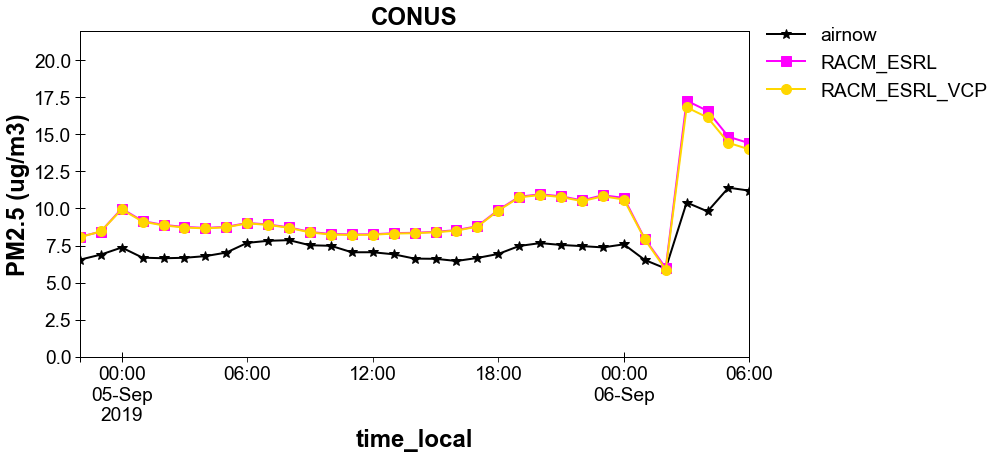

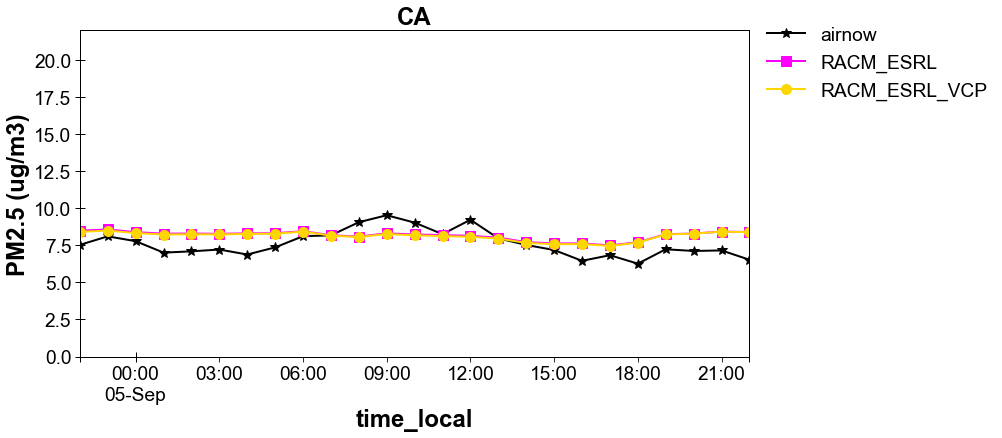

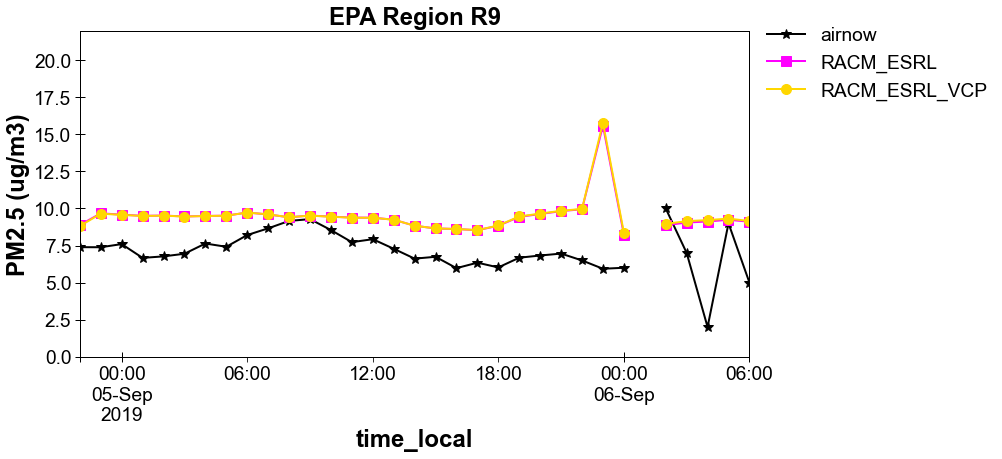

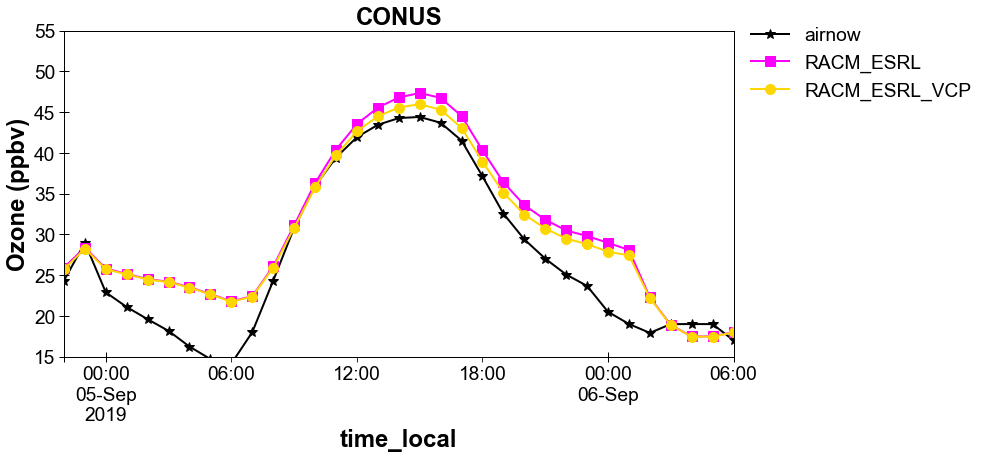

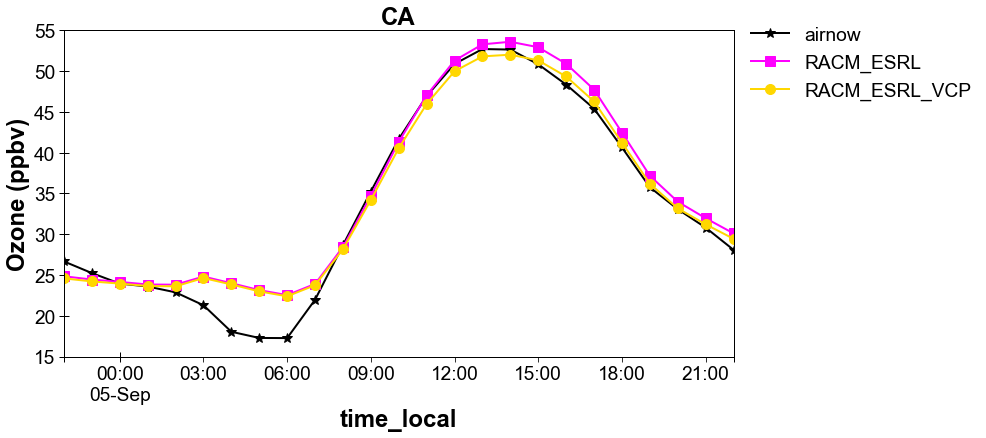

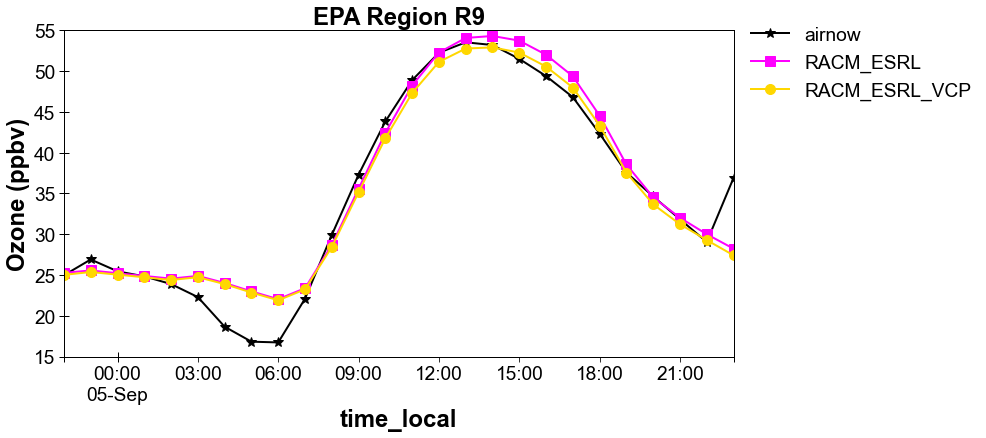

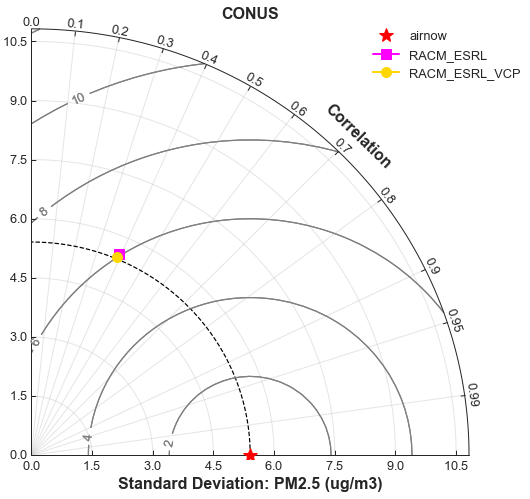

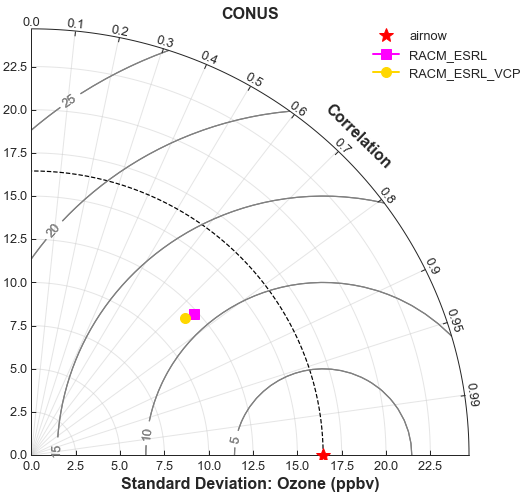

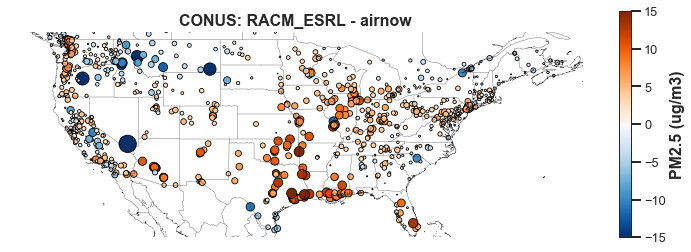

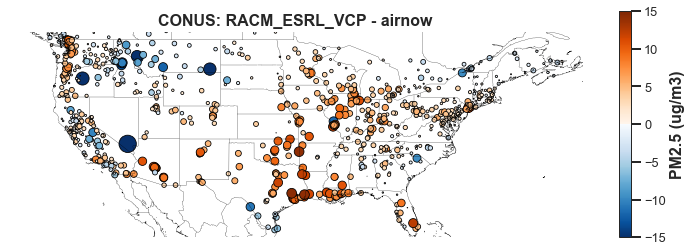

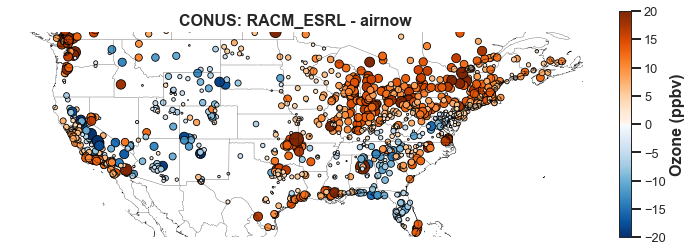

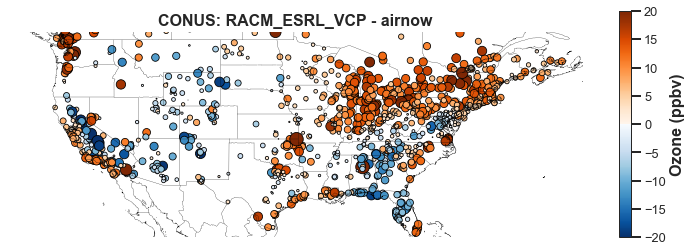

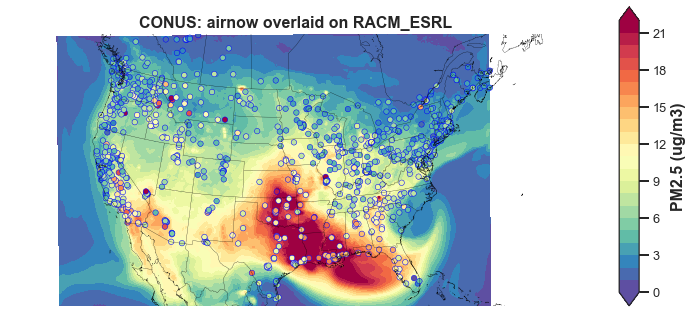

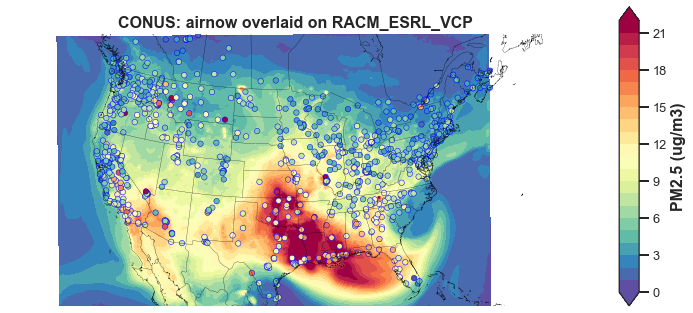

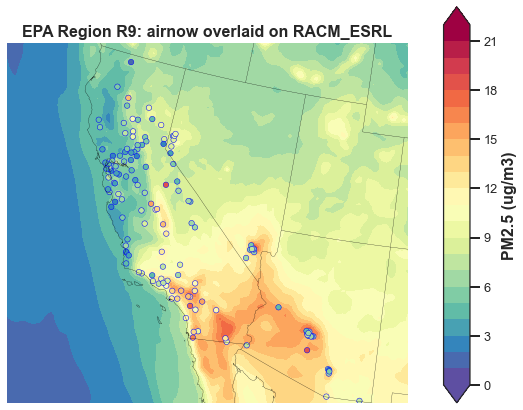

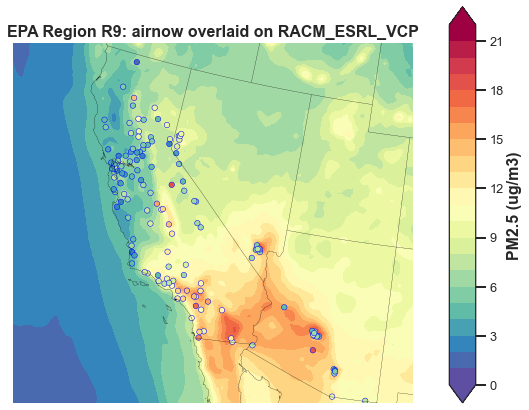

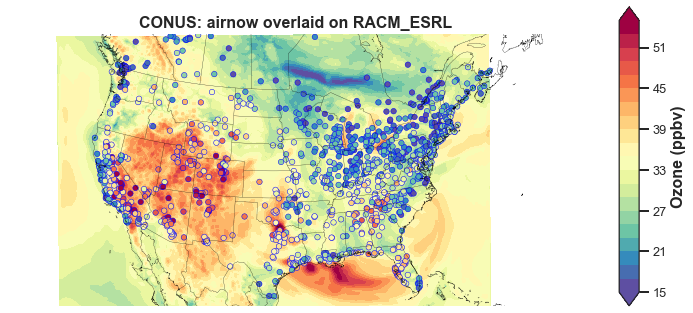

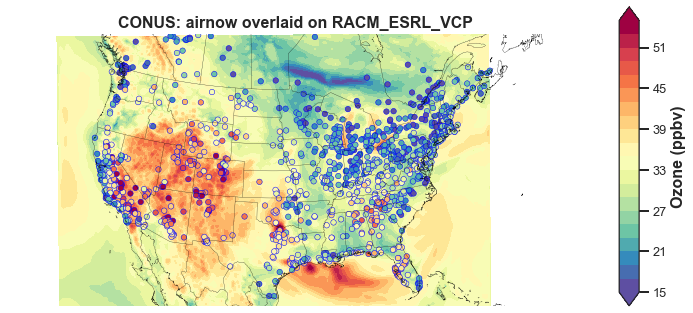

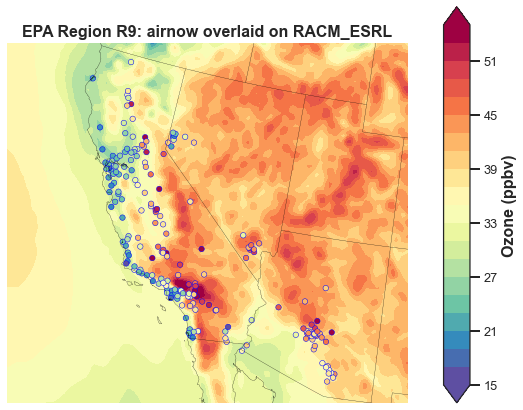

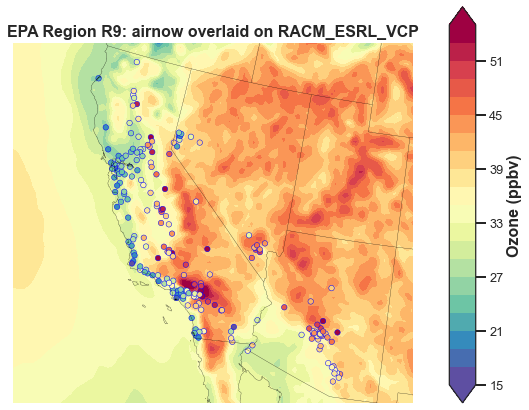

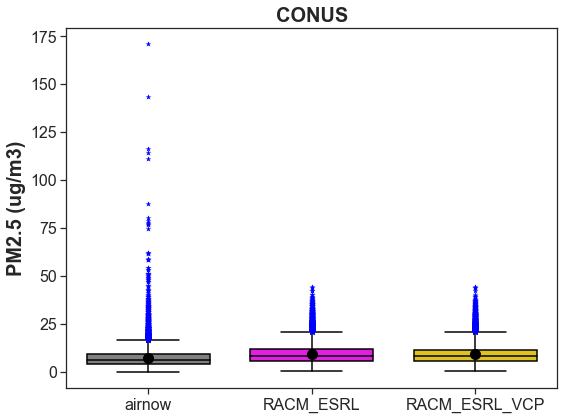

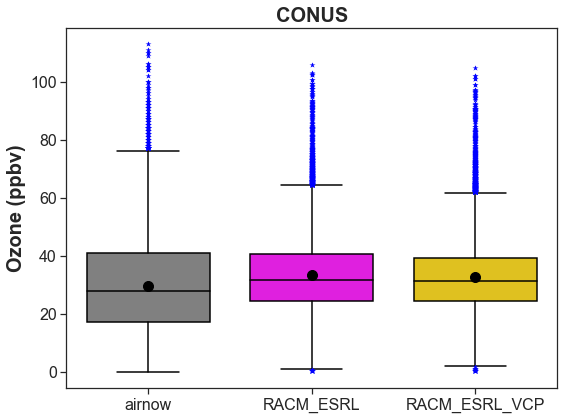

In [15]:
%%time

an.plotting()

The figures are saved in the directory specified by the
{class}`~melodies_monet.driver.analysis` instance's
{attr}`~melodies_monet.driver.analysis.output_dir`
attribute.

## Statistics

The {meth}`~melodies_monet.driver.analysis.stats` routine produces tables of statistics.

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 192-216
```
````

In [16]:
%%time

an.stats()

Wall time: 32.9 s


The stats routine has produced two files (one for each data variable).
This is one of them:
```{literalinclude} output/airnow_wrfchem/stats.OZONE.all.CONUS.2019-09-05_06.2019-09-06_06.csv
:caption:
```